In [1]:
# Load the data from the Apporto machine to the Colab environment

from google.colab import files
uploaded = files.upload()

Saving HW4_FlightDelays.csv to HW4_FlightDelays.csv


In [2]:
import pandas as pd
import statistics

In [3]:
df = pd.read_csv('HW4_FlightDelays.csv')
print(df.head(10))

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

   Binned_CRS_DEP_TIME CARRIER DEST ORIGIN  Weather  DAY_WEEK Flight_Status
0                    5      DH  LGA    IAD        0         5       Delayed
1                    3      DH  LGA    IAD        0         5       Delayed
2                    8      DH  JFK    IAD        0         5       Delayed
3                    4      DH  EWR    IAD        0         5       Delayed
4                    5      DH  EWR    IAD        0         5       Delayed
5                    5      RU  EWR    IAD        0         5       Delayed
6                    8      DH  JFK    IAD        0         6       Delayed
7                    5      DL  JFK    DCA        0         6       Delayed
8                    5      MQ  JFK    DCA        0         6       Delayed
9                    2      DH  EWR    IAD        0         6       Delayed
['Binned_CRS_DEP_TIME' 'CARRIER' 'DEST' 'ORIGIN' 'Weather' 'DAY_WEEK'
 'Flight_Status']
(1319, 7)


In [4]:
cvar_list = [ 'CARRIER', 'DEST', 'ORIGIN', 'Flight_Status','Binned_CRS_DEP_TIME','DAY_WEEK']


rvar_list =['Weather']
df_sample1 = df.drop(columns=rvar_list)

df_sample1.isnull().sum()

Binned_CRS_DEP_TIME    0
CARRIER                0
DEST                   0
ORIGIN                 0
DAY_WEEK               0
Flight_Status          0
dtype: int64

In [5]:
df_sample2 = df_sample1.copy()


df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')


df_sample4 = df_sample3.copy()
df_sample4 = pd.get_dummies(df_sample3, prefix_sep='_')
print(df_sample4)

      Binned_CRS_DEP_TIME_1  ...  Flight_Status_On-time
0                         0  ...                      0
1                         0  ...                      0
2                         0  ...                      0
3                         0  ...                      0
4                         0  ...                      0
...                     ...  ...                    ...
1314                      1  ...                      1
1315                      0  ...                      1
1316                      0  ...                      1
1317                      0  ...                      1
1318                      0  ...                      1

[1319 rows x 31 columns]


In [6]:
rdummies = ['Binned_CRS_DEP_TIME_6','DAY_WEEK_5','CARRIER_DH', 'DEST_LGA', 'ORIGIN_DCA', 'Flight_Status_On-time']
df_sample5 = df_sample4.copy()
df_sample5 = df_sample4.drop(columns=rdummies)

print(df_sample5.columns.values)

print(df_sample5)
print(df)

['Binned_CRS_DEP_TIME_1' 'Binned_CRS_DEP_TIME_2' 'Binned_CRS_DEP_TIME_3'
 'Binned_CRS_DEP_TIME_4' 'Binned_CRS_DEP_TIME_5' 'Binned_CRS_DEP_TIME_7'
 'Binned_CRS_DEP_TIME_8' 'CARRIER_CO' 'CARRIER_DL' 'CARRIER_MQ'
 'CARRIER_OH' 'CARRIER_RU' 'CARRIER_UA' 'CARRIER_US' 'DEST_EWR' 'DEST_JFK'
 'ORIGIN_BWI' 'ORIGIN_IAD' 'DAY_WEEK_1' 'DAY_WEEK_2' 'DAY_WEEK_3'
 'DAY_WEEK_4' 'DAY_WEEK_6' 'DAY_WEEK_7' 'Flight_Status_Delayed']
      Binned_CRS_DEP_TIME_1  ...  Flight_Status_Delayed
0                         0  ...                      1
1                         0  ...                      1
2                         0  ...                      1
3                         0  ...                      1
4                         0  ...                      1
...                     ...  ...                    ...
1314                      1  ...                      0
1315                      0  ...                      0
1316                      0  ...                      0
1317                    

In [7]:
#Data Partiton

from sklearn.model_selection import train_test_split

df4partition = df_sample5
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

      Binned_CRS_DEP_TIME_1  ...  Flight_Status_Delayed
710                       0  ...                      0
1258                      0  ...                      0
435                       0  ...                      0
987                       0  ...                      1
1286                      0  ...                      0
...                     ...  ...                    ...
715                       0  ...                      0
905                       0  ...                      0
1096                      0  ...                      1
235                       0  ...                      1
1061                      0  ...                      1

[1055 rows x 25 columns]


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
#Logistic Regression with Penalty 

#from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


DV = 'Flight_Status_Delayed'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

#alpha = 11
#2
#1
#0.01
#10

#clf = LogisticRegression(C=1/alpha, penalty='l1', solver='saga', max_iter=200, random_state=1).fit(X,y)

# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Logistic Regression analysis
# def summary_coef(model_object):
#   n_predictors = X.shape[1]
#   model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
#   model_coef['Intercept'] = model_object.intercept_
#   return model_coef.transpose()

# print(summary_coef(clf))

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

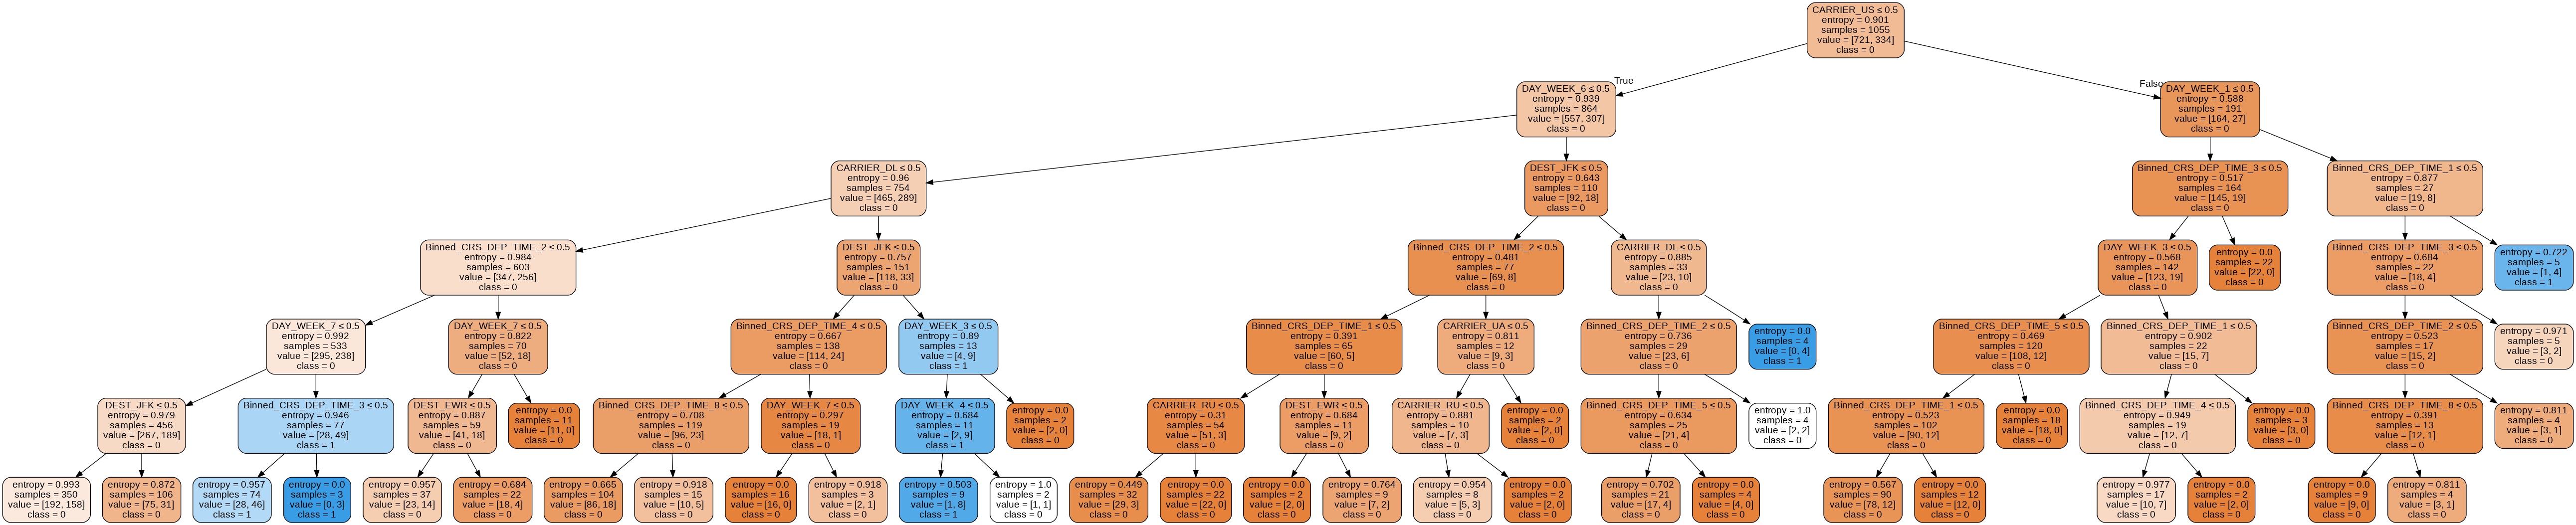

In [14]:
# Run Logistic regression with k-fold cross validation with k=5

kfolds = 5

# min_alpha = 0.001
# max_alpha = 100

maximum_depth = 8
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}



def profit_calculation(model, x_value, y_value):
    d_cutoff = 1/11
    decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
    y = list(y_value)
    n_obs = len(y)
    cum_profit = 0
    for i in range(n_obs):
        if decision[i] == True and y[i] ==1:
            profit = 10
        elif decision[i] == True and y[i] == 0:
            profit = -1
        else:
            profit = 0
        cum_profit = cum_profit / n_obs
        return average_net_profit
    
    
    
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy', random_state=1), param_grid, scoring = 'roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

Image(summary_tree(clf_BPT))


# # n_candidates = 1000

# import numpy as np

# alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

# # C_list is the element-wise inverse of alpha_list. It is required as one of the paramater values for LogisticRegressionCV
# C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))

# # Set n_jobs to be -1 to run LogisticRegressionCV on all CPU cores.
# clf_optimal = LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l1', solver='saga', max_iter=200, random_state=1, n_jobs=-1).fit(X,y)

# # Display the estimated coefficients of the final selected model
# print(summary_coef(clf_optimal))

# # Display the optimal alpha that yields the final selected model (the best model candidate)
# print(1/clf_optimal.C_)

# # Calcuate the error rate over the test partition based on the final selected model

# # y_test_actual is the actual values of the DV in the test partition
# y_test_actual = df_testData[DV]

# # X_test is the predictor values in the test partition
# X_test = df_testData.drop(columns=[DV])

# # Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# # y_test_predicted is the predicted values of the DV in the test partition 
# y_test_predicted = clf_optimal.predict(X_test)

# # Import the metrics package
# from sklearn import metrics

# # Display the confusion matrix over the test partition
# print(metrics.confusion_matrix(y_test_actual, y_test_predicted), 'this is confusion matrix')

# # Display the accuracy over the test partition
# print(clf_optimal.score(X_test, y_test_actual))

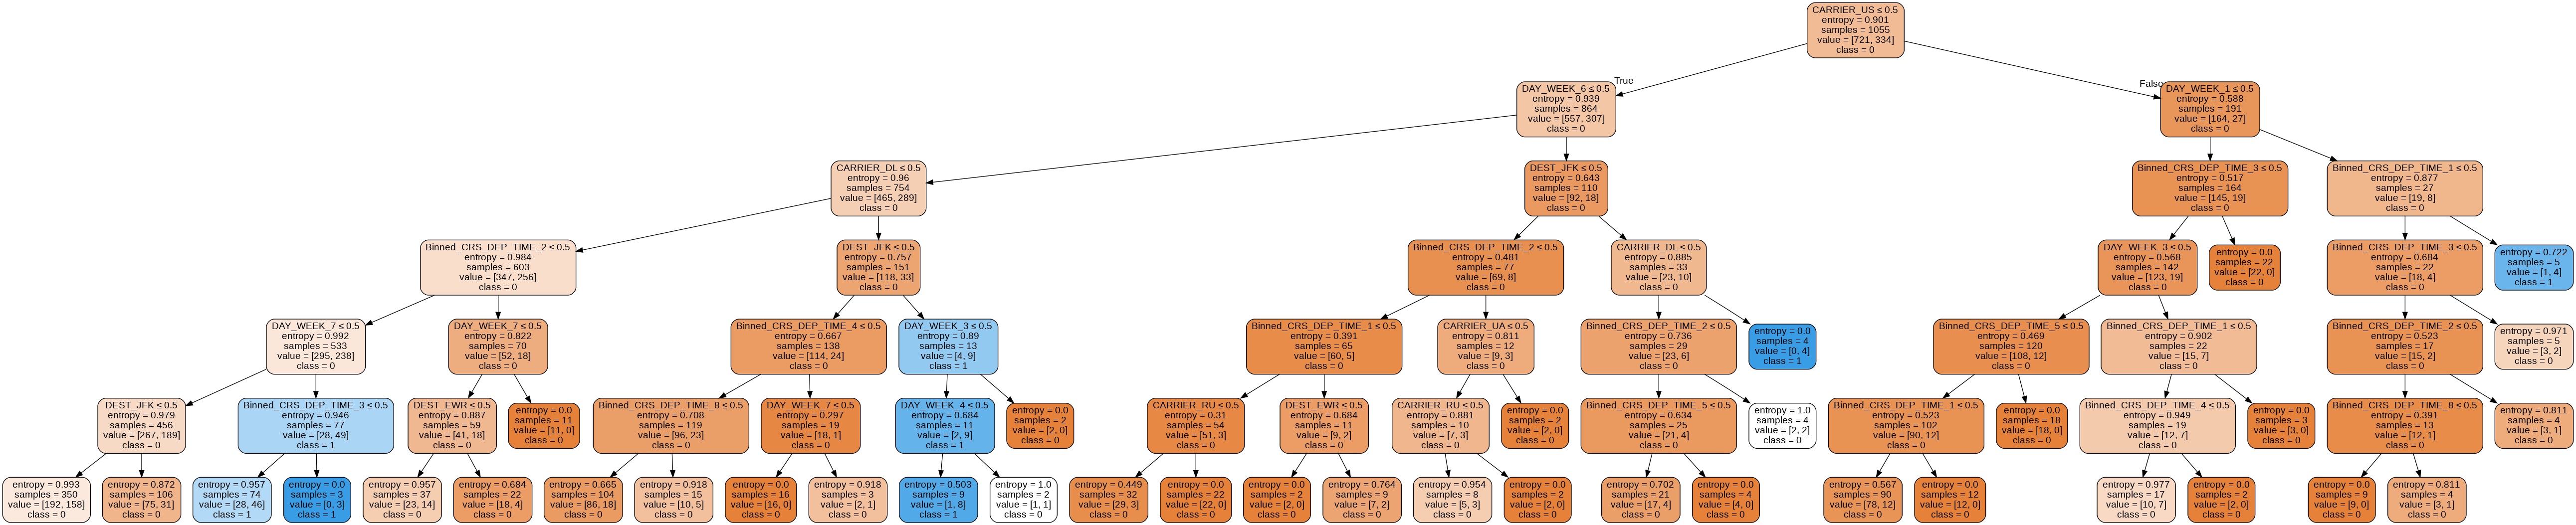

In [13]:
# Run Logistic regression with k-fold cross validation with k=5

kfolds = 5

# min_alpha = 0.001
# max_alpha = 100

maximum_depth = 100
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}



def profit_calculation(model, x_value, y_value):
    d_cutoff = 1/11
    decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
    y = list(y_value)
    n_obs = len(y)
    cum_profit = 0
    for i in range(n_obs):
        if decision[i] == True and y[i] ==1:
            profit = 10
        elif decision[i] == True and y[i] == 0:
            profit = -1
        else:
            profit = 0
        cum_profit = cum_profit / n_obs
        return average_net_profit
    
    
    
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy', random_state=1), param_grid, scoring = 'roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

Image(summary_tree(clf_BPT))

In [15]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])


# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))

6
0.6969336670838548


In [16]:
import numpy as np

# The user-defined function for getting the tree path
# Author: Federico Ibba on stackoverflow.com 
# Created date: Jan 19, 2018
# URL: https://stackoverflow.com/questions/32506951/how-to-explore-a-decision-tree-built-using-scikit-learn/35911666
# Modified by Lin Hao during Oct. 2020

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['CARRIER_US <= 0.5', 'DAY_WEEK_6 <= 0.5', 'CARRIER_DL <= 0.5', 'Binned_CRS_DEP_TIME_2 <= 0.5', 'DAY_WEEK_7 <= 0.5', 'DEST_JFK <= 0.5']
sample = 350
value = [192, 158]
class =  0

Leaf node ID = 2
Path = ['CARRIER_US <= 0.5', 'DAY_WEEK_6 <= 0.5', 'CARRIER_DL <= 0.5', 'Binned_CRS_DEP_TIME_2 <= 0.5', 'DAY_WEEK_7 <= 0.5', 'DEST_JFK > 0.5']
sample = 106
value = [75, 31]
class =  0

Leaf node ID = 3
Path = ['CARRIER_US <= 0.5', 'DAY_WEEK_6 <= 0.5', 'CARRIER_DL <= 0.5', 'Binned_CRS_DEP_TIME_2 <= 0.5', 'DAY_WEEK_7 > 0.5', 'Binned_CRS_DEP_TIME_3 <= 0.5']
sample = 74
value = [28, 46]
class =  1

Leaf node ID = 4
Path = ['CARRIER_US <= 0.5', 'DAY_WEEK_6 <= 0.5', 'CARRIER_DL <= 0.5', 'Binned_CRS_DEP_TIME_2 <= 0.5', 'DAY_WEEK_7 > 0.5', 'Binned_CRS_DEP_TIME_3 > 0.5']
sample = 3
value = [0, 3]
class =  1

Leaf node ID = 5
Path = ['CARRIER_US <= 0.5', 'DAY_WEEK_6 <= 0.5', 'CARRIER_DL <= 0.5', 'Binned_CRS_DEP_TIME_2 > 0.5', 'DAY_WEEK_7 <= 0.5', 'DEST_EWR <= 0.5']
sample = 37
v